In [43]:
import numpy  as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
from   datetime import date
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm  # Suport Vector Machine

# Load data

In [25]:
# The data is taken from: https://www.kaggle.com/imdevskp/corona-virus-report
path_global = 'Data/covid_19_clean_complete.csv'
df_global   = pd.read_csv(path_global, parse_dates=['Date'])

# Introduction

We live in Canada and Colombia, respectivetely. We are interested in comparing how COVID 19 is evolving in Canada and Colombia with different countries and if the decisions or news appearing in the country have any effect.

# Comparison total cases
Here we are comparing the COVID cases in various countries: 
1. Canada
2. Colombia (the country we are from)
2. Italy  
3. Spain
4. South Korea 

In [26]:
# countryList = ['Colombia', 'Canada', 'Italy', 'Spain', 'South Korea', 'Mexico']

# A quick look at the structure of the data 
df_global.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [27]:
# Droping some unused columns
df_global = df_global.drop(columns=['Province/State', 'Lat', 'Long', 'WHO Region'])

# Data for countries of interest
df_Colombia   =  df_global[df_global['Country/Region'] == 'Colombia']
df_Canada     =  df_global[df_global['Country/Region'] == 'Canada']
df_Italy      =  df_global[df_global['Country/Region'] == 'Italy']
df_Spain      =  df_global[df_global['Country/Region'] == 'Spain']
df_SouthKorea =  df_global[df_global['Country/Region'] == 'South Korea']
df_Mexico     =  df_global[df_global['Country/Region'] == 'Mexico']

df_global.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Albania,2020-01-22,0,0,0,0
2,Algeria,2020-01-22,0,0,0,0
3,Andorra,2020-01-22,0,0,0,0
4,Angola,2020-01-22,0,0,0,0


In [28]:
# Counting days from first confirmed case in each country (normalize)
# In the case of Colombia, data is accumulative 

initialDate_Colombia = df_Colombia[df_Colombia['Confirmed'] >= 1]
initialDate_Colombia = initialDate_Colombia['Date'].min()
maxDate_Colombia     = df_Colombia['Date'].max()

print(initialDate_Colombia)
print(maxDate_Colombia)

df_Colombia   = df_Colombia[:]
days_Colombia = df_Colombia['Date'] - initialDate_Colombia

df_Colombia['Day Number']       = days_Colombia.dt.days
df_Colombia['Confirmed Change'] = df_Colombia['Confirmed'].diff()

# A quick look at the last days of COVID-19 in Colombia
df_Colombia.tail()

2020-03-06 00:00:00
2020-06-12 00:00:00


,Country/Region,Date,Confirmed,Deaths,Recovered,Active,Day Number,Confirmed Change
36099,Colombia,2020-06-08,40847,1373,16459,23015,94,2698.0
36360,Colombia,2020-06-09,40847,1373,16459,23015,95,0.0
36621,Colombia,2020-06-10,42206,1439,16566,24201,96,1359.0
36882,Colombia,2020-06-11,43810,1505,17366,24939,97,1604.0
37143,Colombia,2020-06-12,45344,1562,17823,25959,98,1534.0


In [29]:
# Counting days from first confirmed case in each country (normalize)
# For Canada, the data is by province, I group by for this first comparison

initialDate_Canada = df_Canada[df_Canada['Confirmed'] >= 1]
initialDate_Canada = initialDate_Canada['Date'].min()
maxDate_Canada     = df_Canada['Date'].max()

print(initialDate_Canada)
print(maxDate_Canada)

df_Canada = df_Canada.groupby(['Date']).sum().reset_index()
df_Canada = df_Canada[:]

df_Canada['Day Number']       = (df_Canada['Date'] - initialDate_Canada).dt.days
df_Canada['Confirmed Change'] = df_Canada['Confirmed'].diff()

# A quick look at the last days of COVID-19 in Canad
df_Canada.tail()

2020-01-26 00:00:00
2020-06-12 00:00:00


,Date,Confirmed,Deaths,Recovered,Active,Day Number,Confirmed Change
138,2020-06-08,97766,7909,0,89857,134,601.0
139,2020-06-09,98228,7969,0,90259,135,462.0
140,2020-06-10,98707,8037,0,90670,136,479.0
141,2020-06-11,99146,8070,0,91076,137,439.0
142,2020-06-12,99582,8124,0,91458,138,436.0


In [30]:
# Counting days from first confirmed case in each country (normalize)

initialDate_Italy = df_Italy[df_Italy['Confirmed'] >= 1]
initialDate_Italy = initialDate_Italy['Date'].min()
print(initialDate_Italy)

df_Italy = df_Italy[:]
df_Italy['Day Number'] = (df_Italy['Date'] - initialDate_Italy).dt.days
df_Italy['Confirmed Change'] = df_Italy['Confirmed'].diff()
df_Italy.tail()

2020-01-31 00:00:00


,Country/Region,Date,Confirmed,Deaths,Recovered,Active,Day Number,Confirmed Change
36153,Italy,2020-06-08,235278,33964,166584,34730,129,280.0
36414,Italy,2020-06-09,235561,34043,168646,32872,130,283.0
36675,Italy,2020-06-10,235763,34114,169939,31710,131,202.0
36936,Italy,2020-06-11,236142,34167,171338,30637,132,379.0
37197,Italy,2020-06-12,236305,34223,173085,28997,133,163.0


In [31]:
# Counting days from first confirmed case in each country (normalize)

initialDate_Spain = df_Spain[df_Spain['Confirmed'] >= 1]
initialDate_Spain = initialDate_Spain['Date'].min()
print(initialDate_Spain)

df_Spain = df_Spain[:]
df_Spain['Day Number'] = (df_Spain['Date'] - initialDate_Spain).dt.days
df_Spain['Confirmed Change'] = df_Spain['Confirmed'].diff()
df_Spain.tail()

2020-02-01 00:00:00


,Country/Region,Date,Confirmed,Deaths,Recovered,Active,Day Number,Confirmed Change
36217,Spain,2020-06-08,241717,27136,150376,64205,128,167.0
36478,Spain,2020-06-09,241966,27136,150376,64454,129,249.0
36739,Spain,2020-06-10,242280,27136,150376,64768,130,314.0
37000,Spain,2020-06-11,242707,27136,150376,65195,131,427.0
37261,Spain,2020-06-12,243209,27136,150376,65697,132,502.0


In [32]:
# Counting days from first confirmed case in each country (normalize)

initialDate_SouthKorea = df_SouthKorea[df_SouthKorea['Confirmed'] >= 1]
initialDate_SouthKorea = initialDate_SouthKorea['Date'].min()
print(initialDate_SouthKorea)

df_SouthKorea = df_SouthKorea[:]
df_SouthKorea['Day Number']       = (df_SouthKorea['Date'] - initialDate_SouthKorea).dt.days
df_SouthKorea['Confirmed Change'] = df_SouthKorea['Confirmed'].diff()
df_SouthKorea.tail()

2020-01-22 00:00:00


,Country/Region,Date,Confirmed,Deaths,Recovered,Active,Day Number,Confirmed Change
36159,South Korea,2020-06-08,11852,274,10589,989,138,38.0
36420,South Korea,2020-06-09,11902,276,10611,1015,139,50.0
36681,South Korea,2020-06-10,11947,276,10654,1017,140,45.0
36942,South Korea,2020-06-11,12003,277,10669,1057,141,56.0
37203,South Korea,2020-06-12,12051,277,10691,1083,142,48.0


In [33]:
# Counting days from first confirmed case in each country (normalize)

initialDate_Mexico = df_Mexico[df_Mexico['Confirmed'] >= 1]
initialDate_Mexico = initialDate_Mexico['Date'].min()
print(initialDate_Mexico)

df_Mexico = df_Mexico[:]
df_Mexico['Day Number'] = (df_Mexico['Date'] - initialDate_Mexico).dt.days
df_Mexico['Confirmed Change'] = df_Mexico['Confirmed'].diff()
df_Mexico.tail()

2020-02-28 00:00:00


,Country/Region,Date,Confirmed,Deaths,Recovered,Active,Day Number,Confirmed Change
36174,Mexico,2020-06-08,120102,14053,87633,18416,101,2999.0
36435,Mexico,2020-06-09,124301,14649,90748,18904,102,4199.0
36696,Mexico,2020-06-10,129184,15357,93930,19897,103,4883.0
36957,Mexico,2020-06-11,133974,15944,97198,20832,104,4790.0
37218,Mexico,2020-06-12,139196,16448,100876,21872,105,5222.0


Text(0, 0.5, 'log(#Cases)')

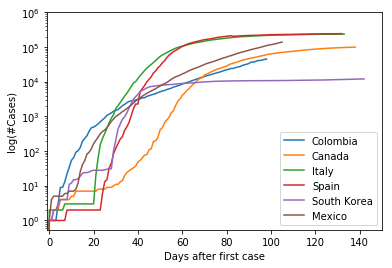

In [39]:
# Comparison between Colombia and Canada behaviour
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.plot(df_Colombia['Day Number'],   df_Colombia['Confirmed'],   label='Colombia')
plt.plot(df_Canada['Day Number'],     df_Canada['Confirmed'],     label='Canada')
plt.plot(df_Italy['Day Number'],      df_Italy['Confirmed'],      label='Italy')
plt.plot(df_Spain['Day Number'],      df_Spain['Confirmed'],      label='Spain')
plt.plot(df_SouthKorea['Day Number'], df_SouthKorea['Confirmed'], label='South Korea')
plt.plot(df_Mexico['Day Number'],     df_Mexico['Confirmed'],     label='Mexico')

ax.legend()
ax.set_xlim(-1, 150)
ax.set_ylim(0, 1000000)
plt.xlabel('Days after first case')
plt.ylabel('log(#Cases)')



Text(0, 0.5, '#Confirmed cases change')

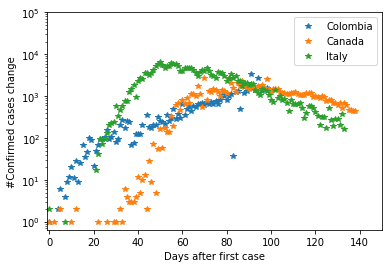

In [40]:
# Comparison between Colombia and Canada behaviour
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.plot(df_Colombia['Day Number'], df_Colombia['Confirmed Change'],'*', label='Colombia')
plt.plot(df_Canada['Day Number'],   df_Canada['Confirmed Change'],  '*', label='Canada')
plt.plot(df_Italy['Day Number'],    df_Italy['Confirmed Change'],   '*', label='Italy')
#plt.plot(df_Spain['Day Number'], df_Spain['Confirmed Change'],'*', label='Spain')
#plt.plot(df_SouthKorea['Day Number'], df_SouthKorea['Confirmed Change'],'*', label='South Korea')
#plt.plot(df_Mexico['Day Number'], df_Mexico['Confirmed Change'],'*', label='Mexico')

ax.legend()
ax.set_xlim(-1, 150)
ax.set_ylim(0, 100000)
plt.xlabel('Days after first case')
plt.ylabel('#Confirmed cases change')

Text(0.04, 0.5, 'Number of cases')

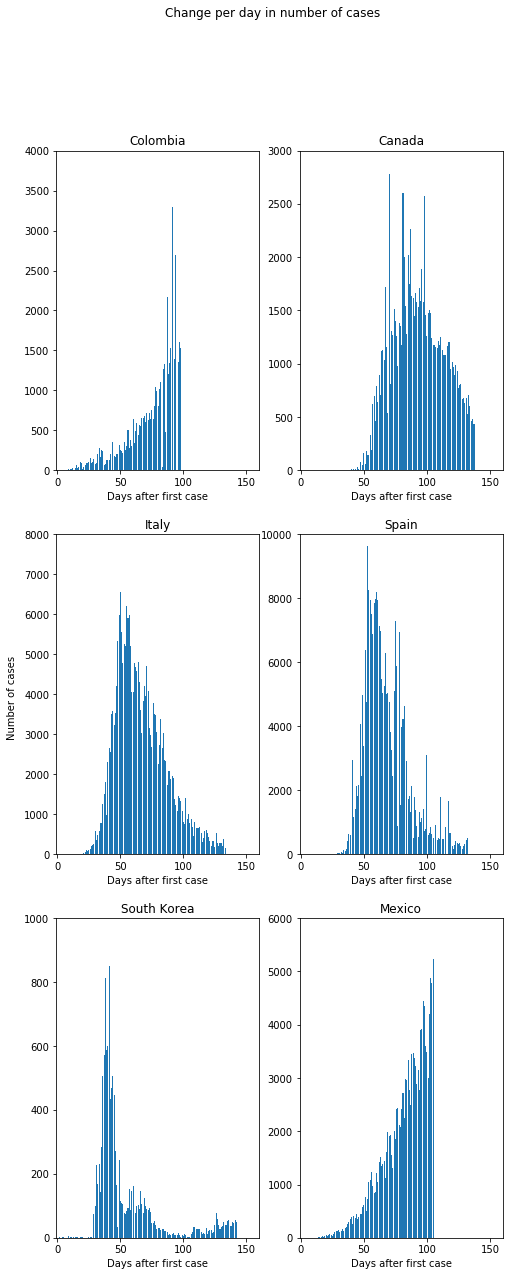

In [41]:
# Comparison between Colombia and Canada behaviour
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(8, 20))

plt.subplot(3, 2, 1)
plt.bar(df_Colombia['Day Number'], df_Colombia['Confirmed Change'], label='Colombia')
plt.title('Colombia')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 4000])

plt.subplot(3, 2, 2)
plt.bar(df_Canada['Day Number'], df_Canada['Confirmed Change'], label='Canada')
plt.title('Canada')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 3000])

plt.subplot(3, 2, 3)
plt.bar(df_Italy['Day Number'], df_Italy['Confirmed Change'], label='Italy')
plt.title('Italy')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 8000]) 

plt.subplot(3, 2, 4)
plt.bar(df_Spain['Day Number'], df_Spain['Confirmed Change'], label='Spain')
plt.title('Spain')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 10000])

plt.subplot(3, 2, 5)
plt.bar(df_SouthKorea['Day Number'], df_SouthKorea['Confirmed Change'], label='South Korea')
plt.title('South Korea')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 1000])

plt.subplot(3, 2, 6)
plt.bar(df_Mexico['Day Number'], df_Mexico['Confirmed Change'], label='Mexico')
plt.title('Mexico')
plt.xlabel("Days after first case")
xmin, xmax, ymin, ymax = plt.axis([-1, 160, 0, 6000])    

title_Fig = 'Change per day in number of cases'
fig.suptitle(title_Fig)

fig.text(0.04, 0.5, ('Number of cases'), va='center', rotation='vertical')

<BarContainer object of 143 artists>

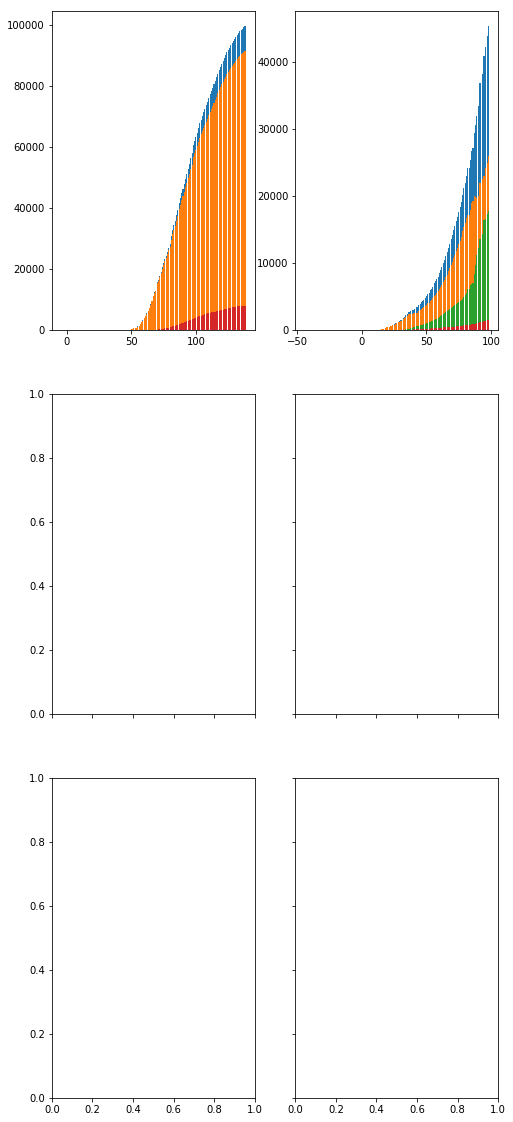

In [61]:

fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(8, 20))

plt.subplot(3, 2, 1)
plt.bar(df_Canada['Day Number'], df_Canada['Confirmed'], label='Confirmed')
plt.bar(df_Canada['Day Number'], df_Canada['Active'], label='Active')
plt.bar(df_Canada['Day Number'], df_Canada['Recovered'], label='Recovered')
plt.bar(df_Canada['Day Number'], df_Canada['Deaths'], label='Deaths')


plt.subplot(3, 2, 2)
plt.bar(df_Colombia['Day Number'], df_Colombia['Confirmed'], label='Confirmed')
plt.bar(df_Colombia['Day Number'], df_Colombia['Active'], label='Active')
plt.bar(df_Colombia['Day Number'], df_Colombia['Recovered'], label='Recovered')
plt.bar(df_Colombia['Day Number'], df_Colombia['Deaths'], label='Deaths')

#Confirmed	Deaths	Recovered	Active

# Using AI as a prediction too for the next two weeks

## Case 1: Canada

In [66]:
# Selecting the values to consider
X = df_Colombia['Day Number']
y = df_Colombia['Confirmed']

# Split for validation


In [67]:
regrModel = svm.SVR()
regrModel.fit(X, y)
regrModel.predict([200])

ValueError: Expected 2D array, got 1D array instead:
array=[-44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.
  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.
  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.
  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.
  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.
  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  97.  98.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.